In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
import folium
from folium.plugins import MarkerCluster
import seaborn as sns

# Project Overview

## Background

This project analyzes tourism destinations using data from the `destination.xlsx` file. The dataset includes:

- **Geographical Information**: Destination name, region, country, latitude, and longitude.
- **Tourism Metrics**: Approximate annual tourists, cultural significance, safety, and cost of living.
- **Cultural Insights**: Famous foods, majority religion, and languages.
- **Travel Tips**: Best times to visit and descriptions.

The goal is to provide a comprehensive overview of tourism hotspots, useful for various stakeholders.

## Stakeholders

1. **Tourism Boards and Local Governments**
   - Identify trends and allocate resources for sustainable tourism growth.
   - Enhance marketing strategies for specific regions.

2. **Travel Agencies and Operators**
   - Design packages tailored to cultural and seasonal highlights.
   - Advise clients on safety, cost, and best times to visit.

3. **Hospitality Industry**
   - Use insights for targeted promotions in hotels, restaurants, and local guides.

4. **Travel Technology Companies**
   - Platforms like Expedia or TripAdvisor can incorporate data into recommendation engines.

5. **Travel Enthusiasts**
   - Individuals can make informed decisions about vacation destinations.

# Analytics Questions

## 1. Tourist Popularity
- Which destinations attract the most tourists annually?
- How does the approximate annual tourist volume differ across countries or regions?
- What is the relationship between the category (e.g., city, island) and the number of tourists visiting each destination?

## 2. Geographic Influence
- What is the geographic distribution of the most popular tourist destinations (using latitude and longitude)?
- Can we visualize clusters of popular tourist spots on a map?

## 3. Cost
- Which destinations have the highest cost of living, and how does it affect tourist volume?
- What regions have a medium or low cost of living but still attract a large number of tourists?

## 4. Famous Foods and Language
- What are the most common types of famous foods across different regions?
- Which destinations are known for unique or specific foods that could be a major attraction for tourists?

## 5. Best Time to Visit
- How does the best time to visit vary across different regions and countries?
- Which destinations have the most favorable times for visiting (e.g., during spring or fall), and how does that influence tourist numbers?

## 6. Exploration by Region
- Which regions attract the most tourists, and how does this vary by region and country?
- Are there specific countries or regions where multiple destinations attract millions of tourists, and if so, why?


**Description of Features**

| Features                    | Description                                                                                                         |
|-----------------------------|---------------------------------------------------------------------------------------------------------------------|
| `Destination`               | The name of the tourist destination.                                                                                |
| `Region`                    | The region within the country where the destination is located.                                                     |
| `Country`                   | The country in which the destination is located.                                                                    |
| `Category`                  | The type of destination, such as city, island, or archaeological site.                                              |
| `Latitude`                  | The latitude coordinate of the destination, used for geographic mapping.                                            |
| `Longitude`                 | The longitude coordinate of the destination, used for geographic mapping.                                           |
| `Approximate Annual Tourists` | The estimated number of tourists visiting the destination annually.                                               |
| `Currency`                  | The currency used in the destination's country.                                                                     |
| `Majority Religion`         | The predominant religion practiced in the destination area.                                                         |
| `Famous Foods`              | Notable local foods that the destination is famous for.                                                             |
| `Language`                  | The primary language spoken at the destination.                                                                     |
| `Best Time to Visit`        | The most favorable times of the year to visit the destination, considering weather and tourist activities.           |
| `Cost of Living`            | An indication of how expensive it is to live or visit the destination, typically categorized as low, medium, or high.|
| `Safety`                    | General safety information for tourists visiting the destination, including any common precautions.                  |
| `Cultural Significance`     | The historical or cultural importance of the destination.                                                           |
| `Description`               | A brief overview of what makes the destination notable or attractive to tourists.                                   |


In [2]:
# Import the datasets
df = pd.read_csv('destinations.csv', encoding='ISO-8859-1')

In [3]:
# Show the general informations regarding the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination                  209 non-null    object 
 1   Region                       209 non-null    object 
 2   Country                      209 non-null    object 
 3   Category                     209 non-null    object 
 4   Latitude                     209 non-null    float64
 5   Longitude                    209 non-null    float64
 6   Approximate Annual Tourists  209 non-null    object 
 7   Currency                     209 non-null    object 
 8   Majority Religion            209 non-null    object 
 9   Famous Foods                 209 non-null    object 
 10  Language                     209 non-null    object 
 11  Best Time to Visit           209 non-null    object 
 12  Cost of Living               209 non-null    object 
 13  Safety              

In [4]:
# Show top 5 rows from the datasets
df.head()

Destination    Region Country Category   Latitude  Longitude  \
0        Rome     Lazio   Italy     City  41.902782  12.496366   
1    Florence   Tuscany   Italy     City  43.769581  11.255772   
2      Venice    Veneto   Italy     City  45.435559  12.336196   
3       Milan  Lombardy   Italy     City  45.464643   9.188540   
4      Naples  Campania   Italy     City  40.851330  14.254720   

  Approximate Annual Tourists Currency Majority Religion  \
0                  14 million     Euro    Roman Catholic   
1                  10 million     Euro    Roman Catholic   
2                  10 million     Euro    Roman Catholic   
3                   7 million     Euro    Roman Catholic   
4                   5 million     Euro    Roman Catholic   

                   Famous Foods Language  \
0          Pizza, Pasta, Gelato  Italian   
1          Pizza, Pasta, Gelato  Italian   
2          Pizza, Pasta, Gelato  Italian   
3  Risotto, Ossobuco, Panettone  Italian   
4         Pizza, Pasta, Cannoli  Italian   

                      Best Time to Visit Cost of Living  \
0  Spring (April-May) or Fall (Sept-Oct)    Medium-high   
1  Spring (April-May) or Fall (Sept-Oct)    Medium-high   
2  Spring (April-May) or Fall (Sept-Oct)    Medium-high   
3  Spring (April-May) or Fall (Sept-Oct)           High   
4  Spring (April-May) or Fall (Sept-Oct)         Medium   

                                          Safety  \
0  Generally safe, but watch out for pickpockets   
1  Generally safe, but watch out for pickpockets   
2  Generally safe, but watch out for pickpockets   
3  Generally safe, but watch out for pickpockets   
4    Generally safe, but be aware of pickpockets   

                               Cultural Significance  \
0  The capital city, known for its historical lan...   
1  A Renaissance city famous for its art, archite...   
2  A unique city built on canals, known for its g...   
3  A fashion capital known for its shopping, muse...   
4  A vibrant city known for its delicious food, h...   

                                         Description  
0  A hub of ancient history and modern culture, w...  
1  Home to world-class museums, including the Uff...  
2  An iconic city of water, renowned for romantic...  
3  A modern city with an ancient soul, featuring ...  
4  Famous for pizza, Pompeii, and proximity to th...

In [5]:
# Data Skimming
def data_skimming(df):
    skimmed_data = pd.DataFrame({
        'feature': df.columns.values,
        'data_type': df.dtypes.values,
        'null_value(%)': df.isna().mean().values * 100,
        'neg_value(%)': [len(df[df[col] < 0]) / len(df) * 100 if df[col].dtype in [np.float64, np.int64] else 0 for col in df.columns],
        '0_value(%)': [len(df[df[col] == 0]) / len(df) * 100 if df[col].dtype in [np.float64, np.int64] else 0 for col in df.columns],
        'duplicate': df.duplicated().sum(),
        'n_unique': df.nunique().values,
        'sample_unique': [df[col].dropna().unique()[:5] for col in df.columns]  # Limited to 5 unique values for better visibility
    })
    
    return skimmed_data.round(3)

In [6]:
skimming_report = data_skimming(df)
skimming_report

feature data_type  null_value(%)  neg_value(%)  \
0                   Destination    object          0.000          0.00   
1                        Region    object          0.000          0.00   
2                       Country    object          0.000          0.00   
3                      Category    object          0.000          0.00   
4                      Latitude   float64          0.000          0.00   
5                     Longitude   float64          0.000         18.66   
6   Approximate Annual Tourists    object          0.000          0.00   
7                      Currency    object          0.000          0.00   
8             Majority Religion    object          0.000          0.00   
9                  Famous Foods    object          0.000          0.00   
10                     Language    object          0.000          0.00   
11           Best Time to Visit    object          0.000          0.00   
12               Cost of Living    object          0.000          0.00   
13                       Safety    object          0.000          0.00   
14        Cultural Significance    object          0.000          0.00   
15                  Description    object         23.923          0.00   

    0_value(%)  duplicate  n_unique  \
0          0.0          0       208   
1          0.0          0       138   
2          0.0          0        21   
3          0.0          0        49   
4          0.0          0       182   
5          0.0          0       184   
6          0.0          0        35   
7          0.0          0        12   
8          0.0          0        10   
9          0.0          0        66   
10         0.0          0        27   
11         0.0          0        14   
12         0.0          0         6   
13         0.0          0         9   
14         0.0          0       208   
15         0.0          0       159   

                                        sample_unique  
0             [Rome, Florence, Venice, Milan, Naples]  
1        [Lazio, Tuscany, Veneto, Lombardy, Campania]  
2            [Italy, Spain, France, Austria, Belgium]  
3   [City, Coastal Town, Coastal Region, Lake, Isl...  
4   [41.902782, 43.769581, 45.435559, 45.464643, 4...  
5   [12.496366, 11.255772, 12.336196, 9.18854, 14....  
6   [14 million, 10 million, 7 million, 5 million,...  
7   [Euro, Danish krone (DKK), Russian Ruble (RUB)...  
8   [Roman Catholic, Protestant, Russian Orthodox,...  
9   [Pizza, Pasta, Gelato, Risotto, Ossobuco, Pane...  
10  [Italian, Spanish, Spanish (and Basque), Frenc...  
11  [Spring (April-May) or Fall (Sept-Oct), Summer...  
12  [Medium-high, High, Medium, Free, Extremely high]  
13  [Generally safe, but watch out for pickpockets...  
14  [The capital city, known for its historical la...  
15  [A hub of ancient history and modern culture, ...

In [7]:
missing = df[df['Description'].isna()]

In [8]:
missing

Destination             Region   Country  \
90                         Athens             Attica    Greece   
91                      Santorini       South Aegean    Greece   
92                        Mykonos       South Aegean    Greece   
93                          Crete              Crete    Greece   
94                         Rhodes       South Aegean    Greece   
95                          Corfu     Ionian Islands    Greece   
96                        Meteora           Thessaly    Greece   
97                         Delphi     Central Greece    Greece   
98                        Nafplio        Peloponnese    Greece   
99                        Olympia        Peloponnese    Greece   
100                        Lisbon             Lisbon  Portugal   
101                         Porto              Porto  Portugal   
102                       Algarve            Algarve  Portugal   
103                       Madeira     Madeira Island  Portugal   
104                        Sintra             Lisbon  Portugal   
105                        ?bidos             Leiria  Portugal   
106                        Aveiro             Aveiro  Portugal   
107                         Braga              Braga  Portugal   
108                       Coimbra            Coimbra  Portugal   
109                  Douro Valley       Douro Valley  Portugal   
179                      Valletta     Central Region     Malta   
180                         Mdina     Central Region     Malta   
181                   Blue Lagoon               Gozo     Malta   
182                    Marsaxlokk    Southern Region     Malta   
183                St. Paul's Bay    Northern Region     Malta   
184                         Rabat    Northern Region     Malta   
185                         Mosta     Central Region     Malta   
186                    Marsaskala    Southern Region     Malta   
187                          Gozo               Gozo     Malta   
188                        Comino             Comino     Malta   
189                     Reykjavik     Capital Region   Iceland   
190                   Blue Lagoon   Southwest Region   Iceland   
191                 Golden Circle      South Iceland   Iceland   
192      Skaftafell National Park      South Iceland   Iceland   
193     Vatnajkull National Park  Southeast Iceland   Iceland   
194                      Akureyri      North Iceland   Iceland   
195  Snfellsjkull National Park       West Iceland   Iceland   
196                    Westfjords         Westfjords   Iceland   
197    Jkuls rl¢n Glacier Lagoon  Southeast Iceland   Iceland   
198  Reynisfjara Black Sand Beach      South Iceland   Iceland   
199                      Belgrade     Central Serbia    Serbia   
200                      Novi Sad          Vojvodina    Serbia   
201                           Ni?    Southern Serbia    Serbia   
202             Belgrade Fortress           Belgrade    Serbia   
203            Tara National Park     Western Serbia    Serbia   
204                      Kopaonik     Central Serbia    Serbia   
205             Novi Sad Fortress           Novi Sad    Serbia   
206              Sremski Karlovci          Vojvodina    Serbia   
207                      Subotica        North Backa    Serbia   
208                Vrnja?ka Banja              Ra?ka    Serbia   

                Category   Latitude  Longitude Approximate Annual Tourists  \
90                  City  37.979452  23.716217                  10 million   
91                Island  36.423967  25.444106                   2 million   
92                Island  37.426508  25.278709                   2 million   
93                Island  35.243662  25.047873                   3 million   
94                Island  36.441904  28.188827                   2 million   
95                Island  39.613728  19.900073                 1.5 million   
96     Monastery Complex  39.729444  21.424722                   1 million   
97   Archaeological Site  38.47

In [9]:
# Find rows with the same destination that have a description
for index, row in missing.iterrows():
    destination = row['Destination']
    # Check if any rows have the same destination but a non-null description
    matching_rows = df[(df['Destination'] == destination) & df['Description'].notna()]
    
    if not matching_rows.empty:
        print(f"Destination: {destination}")
        print("Matching rows with descriptions:")
        print(matching_rows[['Destination', 'Description']])
        print("\n")
    else:
        print(f"No matching description found for Destination: {destination}\n")

No matching description found for Destination: Athens

No matching description found for Destination: Santorini

No matching description found for Destination: Mykonos

No matching description found for Destination: Crete

No matching description found for Destination: Rhodes

No matching description found for Destination: Corfu

No matching description found for Destination: Meteora

No matching description found for Destination: Delphi

No matching description found for Destination: Nafplio

No matching description found for Destination: Olympia

No matching description found for Destination: Lisbon

No matching description found for Destination: Porto

No matching description found for Destination: Algarve

No matching description found for Destination: Madeira

No matching description found for Destination: Sintra

No matching description found for Destination: ?bidos

No matching description found for Destination: Aveiro

No matching description found for Destination: Braga

No ma

In [10]:
# Automatically fill missing descriptions based on existing data
def generate_description(row):
    return f"{row['Destination']} is a beautiful place in {row['Country']}, known for its famous food: {row['Famous Foods']}. It is best visited during {row['Best Time to Visit']} and offers a {row['Cost of Living']} cost of living."

# Apply the function to rows with missing descriptions
df['Description'] = df.apply(lambda row: generate_description(row) if pd.isnull(row['Description']) else row['Description'], axis=1)

In [11]:
# Function to clean and convert the 'Approximate Annual Tourists' column
def clean_tourists(value):
    try:
        # Handle the case where the value is a range (e.g., '35-40'), take the average
        if '-' in value:
            low, high = value.split('-')
            return (float(low) + float(high)) / 2 * 1000000
        # Handle regular cases of "X million"
        elif 'million' in value:
            return float(value.replace(' million', '')) * 1000000
        # Handle values with decimals (e.g., '3.5 million')
        elif '.' in value:
            return float(value) * 1000000
        # If the value is non-numeric (e.g., 'Unknown'), return NaN
        else:
            return None
    except:
        return None

In [12]:
# Apply the cleaning function to the 'Approximate Annual Tourists' column
df['Approximate Annual Tourists Clean'] = df['Approximate Annual Tourists'].apply(clean_tourists)

# Convert to integer, and drop rows with None (non-numeric values)
df_cleaned = df.dropna(subset=['Approximate Annual Tourists Clean'])
df_cleaned['Approximate Annual Tourists Clean'] = df_cleaned['Approximate Annual Tourists Clean'].astype(int)

In [13]:
# Drop the original 'Approximate Annual Tourists' column
df_cleaned = df_cleaned.drop(columns=['Approximate Annual Tourists'])

In [14]:
# Display the cleaned dataframe
df_cleaned

Destination            Region  Country        Category   Latitude  \
0             Rome             Lazio    Italy            City  41.902782   
1         Florence           Tuscany    Italy            City  43.769581   
2           Venice            Veneto    Italy            City  45.435559   
3            Milan          Lombardy    Italy            City  45.464643   
4           Naples          Campania    Italy            City  40.851330   
..             ...               ...      ...             ...        ...   
181    Blue Lagoon              Gozo    Malta           Beach  36.042778   
189      Reykjavik    Capital Region  Iceland            City  64.147778   
190    Blue Lagoon  Southwest Region  Iceland  Geothermal Spa  63.892500   
191  Golden Circle     South Iceland  Iceland          Region  64.006944   
199       Belgrade    Central Serbia   Serbia            City  44.816667   

     Longitude               Currency Majority Religion  \
0    12.496366                   Euro    Roman Catholic   
1    11.255772                   Euro    Roman Catholic   
2    12.336196                   Euro    Roman Catholic   
3     9.188540                   Euro    Roman Catholic   
4    14.254720                   Euro    Roman Catholic   
..         ...                    ...               ...   
181  14.300278             Euro (EUR)    Roman Catholic   
189 -21.915556  Icelandic kr¢na (ISK)        Protestant   
190 -21.863900  Icelandic kr¢na (ISK)        Protestant   
191 -21.132500  Icelandic kr¢na (ISK)        Protestant   
199  20.448889    Serbian dinar (RSD)  Serbian Orthodox   

                       Famous Foods          Language  \
0              Pizza, Pasta, Gelato           Italian   
1              Pizza, Pasta, Gelato           Italian   
2              Pizza, Pasta, Gelato           Italian   
3      Risotto, Ossobuco, Panettone           Italian   
4             Pizza, Pasta, Cannoli           Italian   
..                              ...               ...   
181  Pastizzi, Rabbit Stew, Imqaret  Maltese, English   
189                Fish, Lamb, Skyr         Icelandic   
190                Fish, Lamb, Skyr         Icelandic   
191                Fish, Lamb, Skyr         Icelandic   
199      ?evapi, Pljeskavica, Sarma           Serbian   

                        Best Time to Visit Cost of Living  \
0    Spring (April-May) or Fall (Sept-Oct)    Medium-high   
1    Spring (April-May) or Fall (Sept-Oct)    Medium-high   
2    Spring (April-May) or Fall (Sept-Oct)    Medium-high   
3    Spring (April-May) or Fall (Sept-Oct)           High   
4    Spring (April-May) or Fall (Sept-Oct)         Medium   
..                                     ...            ...   
181                       Summer (Jun-Aug)    Medium-high   
189    Spring (May-June) or Fall (Sep-Oct)           High   
190                             Year-round           High   
191    Spring (May-June) or Fall (Sep-Oct)    Medium-high   
199   Spring (April-May) or Fall (Sep-Oct)         Medium   

                                            Safety  \
0    Generally safe, but watch out for pickpockets   
1    Generally safe, but watch out for pickpockets   
2    Generally safe, but watch out for pickpockets   
3    Generally safe, but watch out for pickpockets   
4      Generally safe, but be aware of pickpockets   
..                                             ...   
181                                 Generally safe   
189                                 Generally safe   
190                                 Generally safe   
191                                 Generally safe   
199    Generally safe, but be aware of pickpockets   

                                 Cultural Significance  \
0    The capital city, known for its historical lan...   
1    A Renaissance city famous for its art, archite...   
2    A unique city built on canals, known for its g...   
3    A fashion capital known for its shopping, muse...   
4    A vibrant city known fo

## ANALYTICS

In [15]:
# Sort the dataframe by the cleaned 'Approximate Annual Tourists Clean' in descending order
df_sorted = df_cleaned.sort_values(by='Approximate Annual Tourists Clean', ascending=False)

In [16]:
# Top 10 destination
df_sorted.head(10)

Destination              Region         Country Category   Latitude  \
160      London      Greater London  United Kingdom     City  51.507351   
140    Istanbul            Istanbul          Turkey     City  41.008238   
0          Rome               Lazio           Italy     City  41.902782   
60       Berlin              Berlin         Germany     City  52.520008   
10    Barcelona           Catalonia           Spain     City  41.385064   
80       Moscow       Moscow Oblast          Russia     City  55.755796   
18      Majorca    Balearic Islands           Spain   Island  39.363371   
1      Florence             Tuscany           Italy     City  43.769581   
61       Munich             Bavaria         Germany     City  48.137152   
50   Copenhagen  Region Hovedstaden         Denmark     City  55.676098   

     Longitude                      Currency     Majority Religion  \
160  -0.127758  British Pound Sterling (GBP)  Christian (Anglican)   
140  28.978359            Turkish lira (TRY)                Muslim   
0    12.496366                          Euro        Roman Catholic   
60   13.404954                          Euro            Protestant   
10    2.173135                          Euro        Roman Catholic   
80   37.617315           Russian Ruble (RUB)      Russian Orthodox   
18    3.014272                          Euro        Roman Catholic   
1    11.255772                          Euro        Roman Catholic   
61   11.576123                          Euro            Protestant   
50   12.568337            Danish krone (DKK)            Protestant   

                                    Famous Foods Language  \
160  Fish and chips, Sunday roast, Afternoon tea  English   
140                        Kebab, Baklava, Dolma  Turkish   
0                           Pizza, Pasta, Gelato  Italian   
60             Currywurst, Bratwurst, Sauerkraut   German   
10                       Paella, Tapas, Gazpacho  Spanish   
80                       Borscht, Pelmeni, Blini  Russian   
18       Paella, Ensalada Mallorquina, Sobrasada  Spanish   
1                           Pizza, Pasta, Gelato  Italian   
61                   Weiáwurst, Brezn, Leberkse   German   
50             Sm?rrebr?d, Frikadeller, blekage   Danish   

                        Best Time to Visit Cost of Living  \
160   Spring (April-May) or Fall (Sep-Oct)           High   
140     Spring (Apr-May) or Fall (Sep-Oct)    Medium-high   
0    Spring (April-May) or Fall (Sept-Oct)    Medium-high   
60   Spring (April-May) or Fall (Sept-Oct)    Medium-high   
10   Spring (April-May) or Fall (Sept-Oct)    Medium-high   
80    Spring (May-June) or Fall (Sept-Oct)    Medium-high   
18   Spring (April-May) or Fall (Sept-Oct)    Medium-high   
1    Spring (April-May) or Fall (Sept-Oct)    Medium-high   
61   Spring (April-May) or Fall (Sept-Oct)    Medium-high   
50   Spring (April-May) or Fall (Sept-Oct)           High   

                                            Safety  \
160    Generally safe, but be aware of pickpockets   
140    Generally safe, but be aware of pickpockets   
0    Generally safe, but watch out for pickpockets   
60       Generally safe, but watch for pickpockets   
10   Generally safe, but watch out for pickpockets   
80     Generally safe, but be aware of pickpockets   
18     Generally safe, but be aware of pickpockets   
1    Generally safe, but watch out for pickpockets   
61                                  Generally safe   
50                                  Generally safe   

                                 Cultural Significance  \
160  The capital city, known for its Buckingham Pal...   
140  Historic city straddling Europe and Asia with ...   
0    The capital city, known for its historical lan...   
60   The capital city known for its historical land...   
10   Known for its Gaudi architecture, beautiful be...   
80   Capital city known for the Kremlin, Red Square...   
18   A popular island destination known for its bea...   
1   

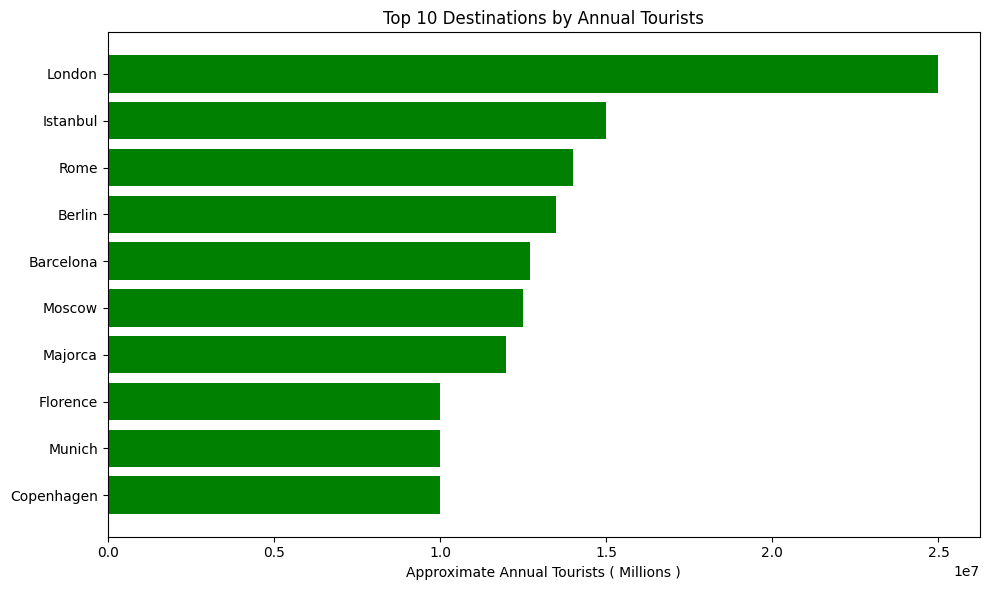

In [17]:
# Plotting the top destinations that attract the most tourists annually
plt.figure(figsize=(10, 6))

# Select the top 10 destinations for visualization
top_10_destinations = df_sorted[['Destination', 'Approximate Annual Tourists Clean']].head(10)

# Create a bar chart
plt.barh(top_10_destinations['Destination'], top_10_destinations['Approximate Annual Tourists Clean'], color='green')

# Invert the y-axis to have the largest on top
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Approximate Annual Tourists ( Millions )')
plt.title('Top 10 Destinations by Annual Tourists')

# Show the plot
plt.tight_layout()
plt.show()

The plot reveals several insights:

1. **London's Dominance**: London is the leading destination, attracting the highest number of tourists annually. This suggests its strong global appeal, possibly due to its cultural landmarks and international connectivity.

2. **Popularity of Historical Cities**: Cities like Istanbul, Rome, and Berlin are also top destinations, likely due to their rich historical and cultural heritage.

3. **European Tourist Appeal**: The list is dominated by European cities, indicating the continent's broad attraction for international tourists, each offering unique experiences.

4. **Emerging Interest**: Cities like Majorca and Copenhagen, while attracting fewer tourists, show potential for growth in tourism, indicating rising interest in these destinations.

In [18]:
# Bottom 10 destination
df_sorted.tail(10)

Destination            Region      Country      Category   Latitude  \
122        Malm      Skne County       Sweden          City  55.609934   
145       Bodrum     Aegean Region       Turkey          Town  37.134596   
129  Vasa Museum  Stockholm County       Sweden        Museum  59.329302   
34          Graz            Styria      Austria          City  47.070593   
133   Interlaken              Bern  Switzerland          Town  46.680278   
136  Rhine Falls      Schaffhausen  Switzerland     Waterfall  47.567778   
33     Hallstatt     Upper Austria      Austria          Town  47.556733   
84   Vladivostok    Primorsky Krai       Russia          City  43.565133   
144    Pamukkale     Aegean Region       Turkey  Natural Site  37.779722   
25    Strasbourg         Grand Est       France          City  48.572935   

      Longitude             Currency Majority Religion  \
122   13.007758  Swedish krona (SEK)        Protestant   
145   27.384188   Turkish lira (TRY)            Muslim   
129   18.068581  Swedish krona (SEK)        Protestant   
34    15.438261                 Euro    Roman Catholic   
133    7.855833    Swiss franc (CHF)        Protestant   
136    8.675556    Swiss franc (CHF)        Protestant   
33    13.649528                 Euro    Roman Catholic   
84   131.885929  Russian Ruble (RUB)  Russian Orthodox   
144   29.082500   Turkish lira (TRY)            Muslim   
25     7.751936                 Euro    Roman Catholic   

                                          Famous Foods             Language  \
122             Kttbullar, Fika, Jansson's Temptation              Swedish   
145                              Kebab, Baklava, Dolma              Turkish   
129             Kttbullar, Fika, Jansson's Temptation              Swedish   
34            Backhendl, Krbiskernsuppe, Apfelstrudel               German   
133                            Fondue, Rsti, Raclette       German, French   
136                            Fondue, Rsti, Raclette       German, French   
33   Kaiserschmarrn, Salzburger Nockerl, Wiener Sch...               German   
84                             Borscht, Pelmeni, Blini              Russian   
144                              Kebab, Baklava, Dolma              Turkish   
25                Quiche Lorraine, Choucroute, Bredele  French (and German)   

                        Best Time to Visit Cost of Living  \
122   Spring (May-June) or Fall (Sept-Oct)         Medium   
145     Spring (Apr-May) or Fall (Sep-Oct)    Medium-high   
129                             Year-round         Medium   
34   Spring (April-May) or Fall (Sept-Oct)         Medium   
133     Spring (Apr-May) or Fall (Sep-Oct)    Medium-high   
136     Spring (Apr-May) or Fall (Sep-Oct)         Medium   
33   Spring (April-May) or Fall (Sept-Oct)    Medium-high   
84    Spring (May-June) or Fall (Sept-Oct)    Medium-high   
144     Spring (Apr-May) or Fall (Sep-Oct)         Medium   
25   Spring (April-May) or Fall (Sept-Oct)    Medium-high   

                                          Safety  \
122                               Generally safe   
145                               Generally safe   
129                               Generally safe   
34                                Generally safe   
133                               Generally safe   
136                               Generally safe   
33                                Generally safe   
84                                Generally safe   
144                               Generally safe   
25   Generally safe, but be aware of pickpockets   

                                 Cultural Significance  \
122  Coastal city known for modern architecture, mu...   
145  Coastal town known for beaches and ancient ruins.   
129  Maritime museum featuring a preserved 17th-cen...   
34   Known for its well-preserved Old Town, museums...   
133  Popular resort town known for outdoor activities.   
136    Europe's largest waterfall with stunning views.   
33   Fam

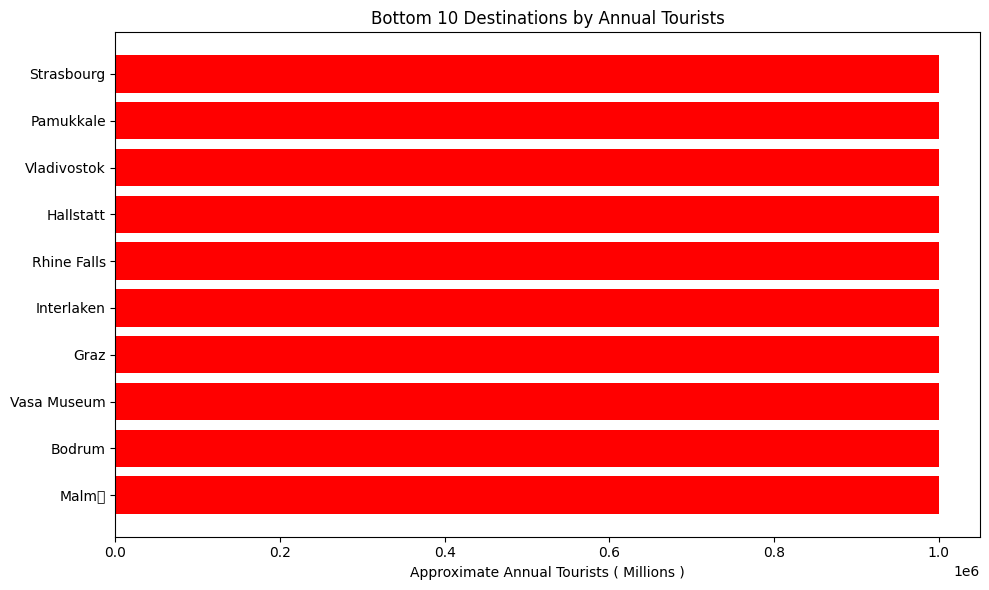

In [19]:
# Plotting the top destinations that attract the most tourists annually
plt.figure(figsize=(10, 6))

# Select the top 10 destinations for visualization
bottom_10_destinations = df_sorted[['Destination', 'Approximate Annual Tourists Clean']].tail(10)

# Create a bar chart
plt.barh(bottom_10_destinations['Destination'], bottom_10_destinations['Approximate Annual Tourists Clean'], color='red')

# Add labels and title
plt.xlabel('Approximate Annual Tourists ( Millions )')
plt.title('Bottom 10 Destinations by Annual Tourists')

# Show the plot
plt.tight_layout()
plt.show()

The plot of the bottom 10 tourist destinations by annual visitors reveals several insights:

1. **Niche Appeal**: These destinations, including places like Strasbourg and Pamukkale, attract fewer tourists, possibly indicating a more niche appeal or specialized interest.

2. **Cultural and Natural Attractions**: Locations such as the Vasa Museum and Rhine Falls suggest that cultural and natural sites are still significant draws, albeit to smaller audiences.

3. **Potential for Growth**: The relatively low tourist numbers may indicate potential for development and increased marketing to boost tourism.

4. **Regional Interest**: Many of these destinations may primarily attract regional tourists or those with specific interests, highlighting opportunities to broaden their appeal internationally.

In [20]:
# group by country and sum the tourists
tourists_by_country = df_cleaned.groupby('Country')['Approximate Annual Tourists Clean'].sum().reset_index()

In [21]:
# Sort by the number of tourists
tourists_by_country = tourists_by_country.sort_values(by='Approximate Annual Tourists Clean', ascending=False)

In [22]:
tourists_by_country

Country  Approximate Annual Tourists Clean
7            Italy                           54500000
4          Germany                           53000000
15           Spain                           52200000
18          Turkey                           47500000
20  United Kingdom                           38500000
13          Russia                           32000000
1          Belgium                           30000000
5           Greece                           22500000
2          Denmark                           20500000
0          Austria                           16500000
3           France                           15500000
12        Portugal                           11000000
10          Monaco                            9000000
17     Switzerland                            8500000
19         Ukraine                            6500000
16          Sweden                            6000000
11          Norway                            5000000
6          Iceland                            4500000
9            Malta                            3500000
8       Luxembourg                            1500000
14          Serbia                            1500000

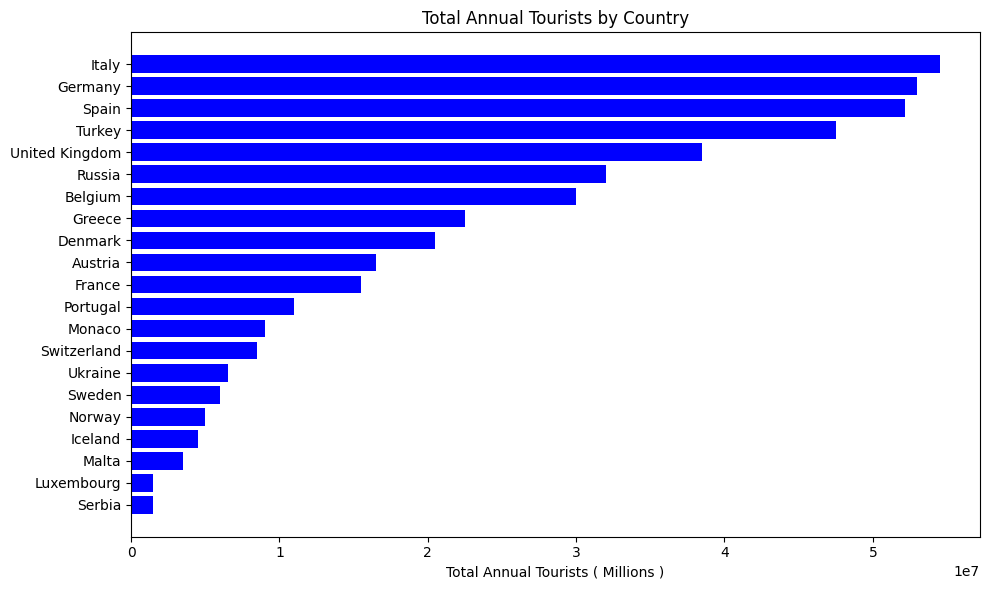

In [23]:
# Plot the total number of tourists by country
plt.figure(figsize=(10, 6))
plt.barh(tourists_by_country['Country'], tourists_by_country['Approximate Annual Tourists Clean'], color='blue')

# Add labels and title
plt.xlabel('Total Annual Tourists ( Millions )')
plt.title('Total Annual Tourists by Country')

# Invert the y-axis to have the largest on top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()

The chart highlights Italy as the leading tourist destination, with Western European countries like Germany and Spain also attracting significant numbers. This suggests a strong preference for countries with rich cultural and historical offerings.

Insights:
Cultural Appeal: Italy's top position underscores the enduring appeal of cultural and historical attractions.<br>
Tourism Infrastructure: Western European countries benefit from well-developed tourism infrastructure and diverse attractions.<br>
Growth Potential: Emerging destinations like Turkey and Russia show increasing tourist interest, suggesting potential for further growth.<br>
Regional Opportunities: Countries with fewer tourists, like Serbia and Luxembourg, could expand their tourism sectors through strategic development and marketing.<br>

In [24]:
# Group by region and sum the tourists
tourists_by_region = df_cleaned.groupby('Region')['Approximate Annual Tourists Clean'].sum().reset_index()

In [25]:
# Sort by the number of tourists
tourists_by_region = tourists_by_region.sort_values(by='Approximate Annual Tourists Clean', ascending=False)

In [26]:
# Split into top 10 and bottom 10 regions
top_10_regions = tourists_by_region.head(10)
bottom_10_regions = tourists_by_region.tail(10)

In [27]:
top_10_regions

Region  Approximate Annual Tourists Clean
35            Istanbul                           32000000
30      Greater London                           25000000
8     Balearic Islands                           20000000
60  Region Hovedstaden                           14000000
39               Lazio                           14000000
11              Berlin                           13500000
16           Catalonia                           12700000
50       Moscow Oblast                           12500000
10             Bavaria                           12500000
75             Tuscany                           11500000

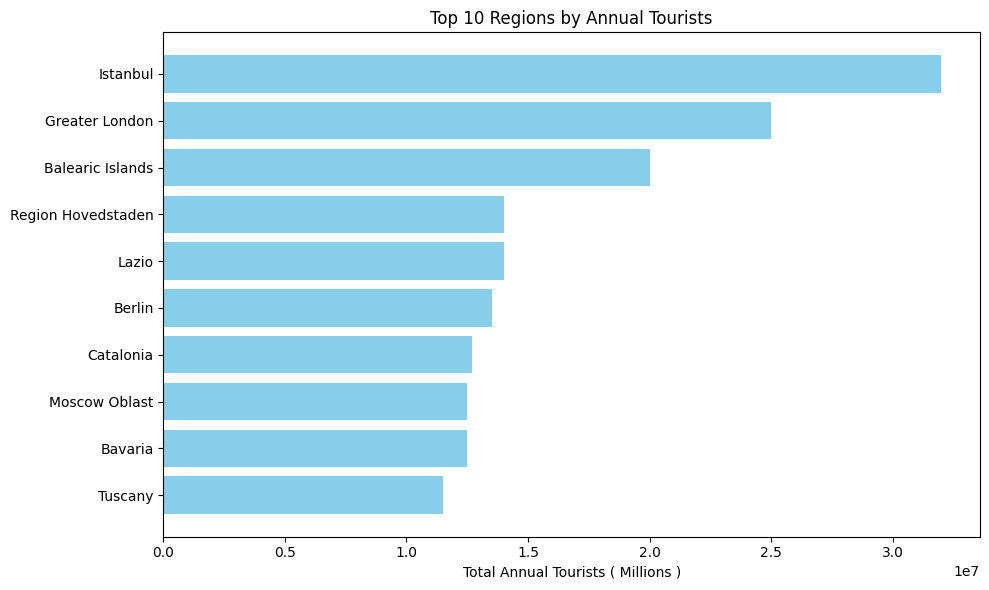

In [28]:
# Plot top 10 regions
plt.figure(figsize=(10, 6))
plt.barh(top_10_regions['Region'], top_10_regions['Approximate Annual Tourists Clean'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Total Annual Tourists ( Millions )')
plt.title('Top 10 Regions by Annual Tourists')
plt.tight_layout()
plt.show()

## Insights

1. **Istanbul's Appeal**: Istanbul leads in tourist numbers, highlighting its cultural and historical significance.
2. **Diverse Attractions**: Regions like Greater London and the Balearic Islands attract tourists with a mix of urban and scenic experiences.
3. **Cultural Hubs**: Areas such as Lazio and Berlin are popular for their rich history and cultural offerings.
4. **Tourism Hotspots**: Regions like Catalonia and Tuscany show the appeal of combining cultural heritage with natural beauty.

## Conclusion

The chart demonstrates that regions with a blend of cultural, historical, and scenic attractions are top tourist destinations. Istanbul's leading position underscores the city's global appeal, while the presence of both urban and rural areas suggests that diverse offerings can attract substantial tourist numbers.


In [29]:
bottom_10_regions

Region  Approximate Annual Tourists Clean
55      Odesa Oblast                            1000000
66      Schaffhausen                            1000000
51             Namur                            1000000
74          Thessaly                            1000000
73            Styria                            1000000
71  Southwest Region                            1000000
70     South Iceland                            1000000
18    Central Greece                            1000000
68      Skne County                            1000000
28              Gozo                            1000000

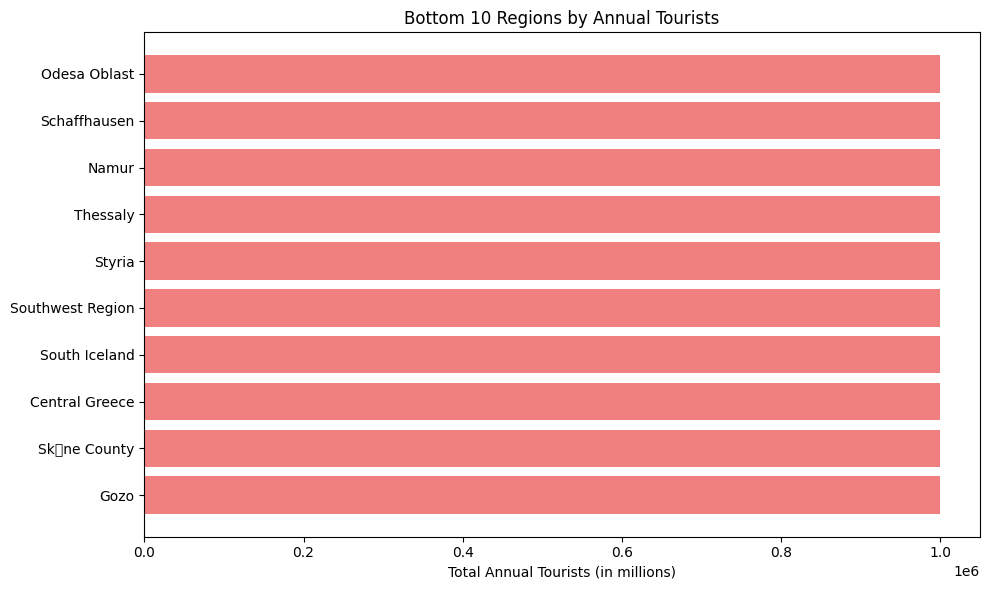

In [30]:
# Plot bottom 10 regions
plt.figure(figsize=(10, 6))
plt.barh(bottom_10_regions['Region'], bottom_10_regions['Approximate Annual Tourists Clean'], color='lightcoral')
plt.gca().invert_yaxis()
plt.xlabel('Total Annual Tourists (in millions)')
plt.title('Bottom 10 Regions by Annual Tourists')
plt.tight_layout()
plt.show()

## Insights

1. **Niche Appeal**: Regions like Odesa Oblast and Schaffhausen may have niche attractions that appeal to specific interest groups.
2. **Local and Regional Focus**: These areas might rely more on local or regional tourism rather than international visitors.
3. **Potential for Growth**: The lower tourist numbers suggest opportunities for development and increased marketing to boost tourism.
4. **Cultural and Natural Attractions**: Despite fewer visitors, regions like South Iceland and Central Greece offer rich cultural or scenic experiences.

## Conclusion

The chart indicates that these regions, while attracting fewer tourists, have unique offerings that could be leveraged for growth. By enhancing marketing strategies and infrastructure, these areas could potentially increase their tourist appeal and attract more international visitors.


In [31]:
# Group by category and sum the tourists
tourists_by_category = df_cleaned.groupby('Category')['Approximate Annual Tourists Clean'].sum().reset_index()

In [32]:
# Sort by number of tourists
tourists_by_category = tourists_by_category.sort_values(by='Approximate Annual Tourists Clean', ascending=False)

In [33]:
tourists_by_category

Category  Approximate Annual Tourists Clean
6                  City                          320200000
14               Island                           35000000
24               Region                           13000000
2                Bazaar                           10000000
7          Coastal City                            7500000
27                 Town                            6000000
21               Palace                            5000000
0        Amusement Park                            4000000
15                 Lake                            3500000
9          Coastal Town                            3000000
10             District                            3000000
19        National Park                            3000000
26           Theme Park                            2500000
1   Archaeological Site                            2500000
8        Coastal Region                            2000000
25               Square                            2000000
5                Church                            2000000
18               Museum                            2000000
17               Mosque                            2000000
12               Forest                            2000000
4                Castle                            1500000
16    Monastery Complex                            1000000
20         Natural Site                            1000000
13       Geothermal Spa                            1000000
22            Peninsula                            1000000
23     Prehistoric Site                            1000000
11                Fjord                            1000000
3                 Beach                            1000000
28            Waterfall                            1000000

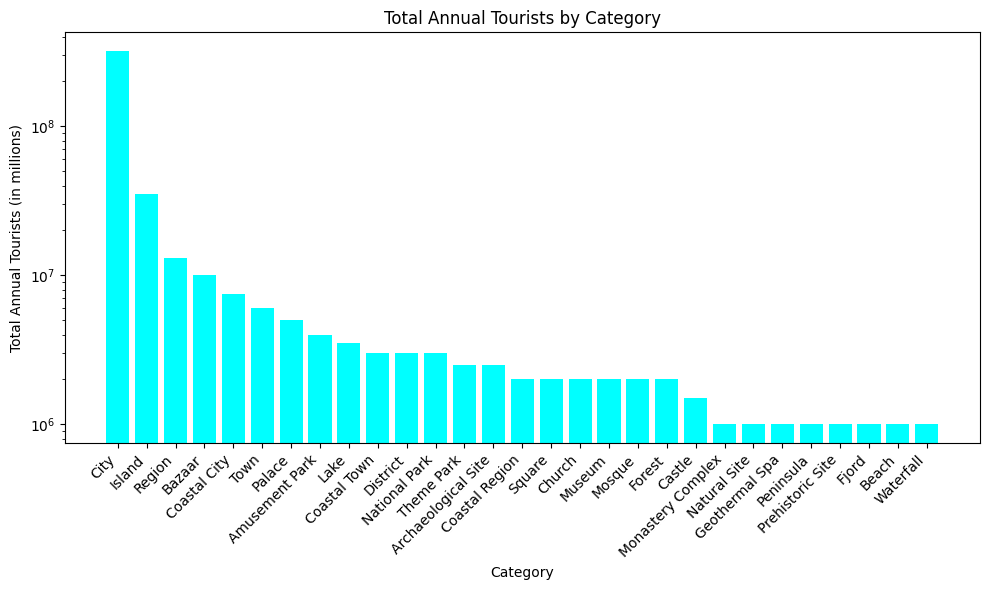

In [34]:
# Plotting the number of tourists by category with better readability
plt.figure(figsize=(10, 6))

# Bar plot with x-axis label rotation for better readability
plt.bar(tourists_by_category['Category'], tourists_by_category['Approximate Annual Tourists Clean'], color='cyan')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Optionally, use a logarithmic scale for better distribution of values
plt.yscale('log')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Total Annual Tourists (in millions)')
plt.title('Total Annual Tourists by Category')

# Show the plot
plt.tight_layout()
plt.show()


## Insights

1. **Cities as Major Attractions**: Cities attract the highest number of tourists, indicating their strong appeal due to cultural, historical, and entertainment offerings.
2. **Natural and Scenic Appeal**: Islands and regions also draw significant numbers, highlighting the allure of natural beauty and diverse landscapes.
3. **Diverse Interests**: Categories like amusement parks, palaces, and coastal cities show that tourists have varied interests, from entertainment to historical exploration.
4. **Niche Categories**: Attractions like geothermal sites and prehistoric sites, while less visited, cater to specific interests and offer unique experiences.

## Conclusion

The chart illustrates that cities remain the primary draw for tourists, but there is also substantial interest in natural and diverse attractions. This diversity in tourist preferences suggests opportunities for destinations to leverage their unique features and cater to a wide range of interests.


In [35]:
# Create a map centered at the average coordinates
m = folium.Map(location=[df_cleaned['Latitude'].mean(), df_cleaned['Longitude'].mean()], zoom_start=4)

# Add markers for each destination
for i, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Destination']).add_to(m)

# Display the map
m.save('tourist_destinations_map.html')  # This will save the map as an HTML file and you can open in a browser


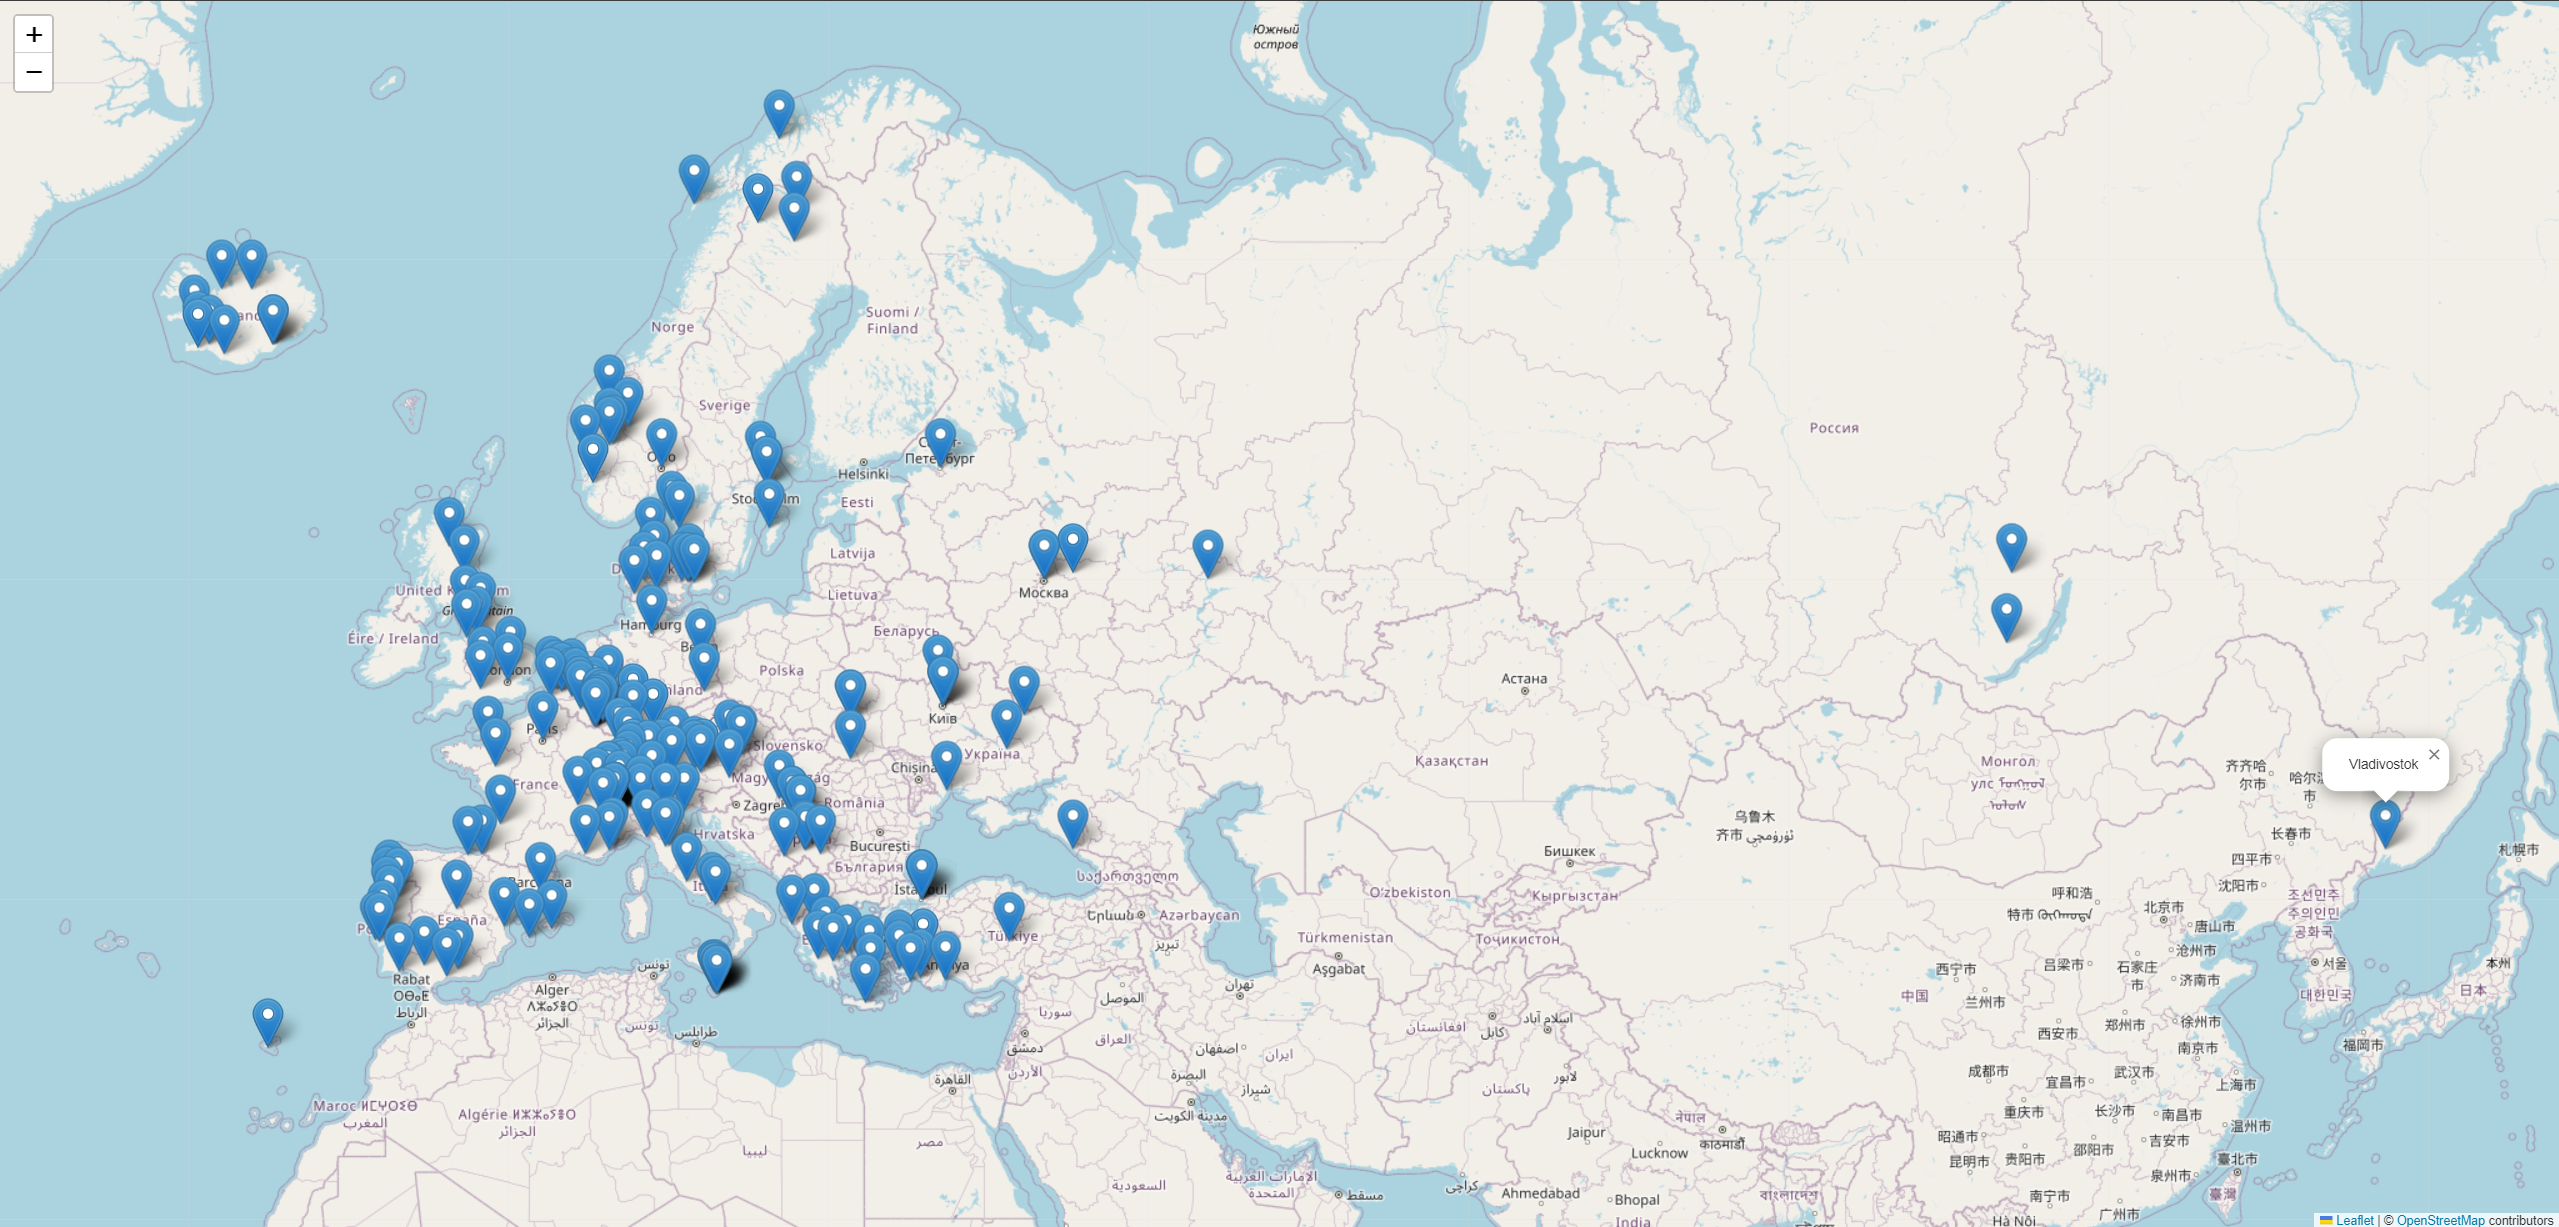

## Insights from the Map

1. **Dense Clusters in Western Europe**: There is a high concentration of tourist spots in Western Europe, highlighting its popularity and rich cultural heritage.

2. **Scattered Points in Eastern Europe and Russia**: Fewer destinations are marked in Eastern Europe and Russia, indicating potential growth areas or niche attractions.

3. **Diverse Attractions**: The spread of markers suggests a variety of attractions, from historical cities to natural landscapes.

4. **Tourism Hotspots**: Regions like the Mediterranean and Scandinavia also show significant tourist interest, likely due to their unique cultural and natural offerings.


In [36]:
# Create a map centered at an average latitude and longitude
m = folium.Map(location=[df_cleaned['Latitude'].mean(), df_cleaned['Longitude'].mean()], zoom_start=5)

# Add a marker cluster layer to the map
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each tourist destination
for i, row in df_cleaned.iterrows():
    popup_text = f"{row['Destination']}<br>Tourists: {row['Approximate Annual Tourists Clean']/1e6:.1f} million<br>Category: {row['Category']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color="blue" if row['Category'] == 'City' else "green")
    ).add_to(marker_cluster)

# Save the map as an HTML file and display it
m.save('tourist_clusters_map.html')

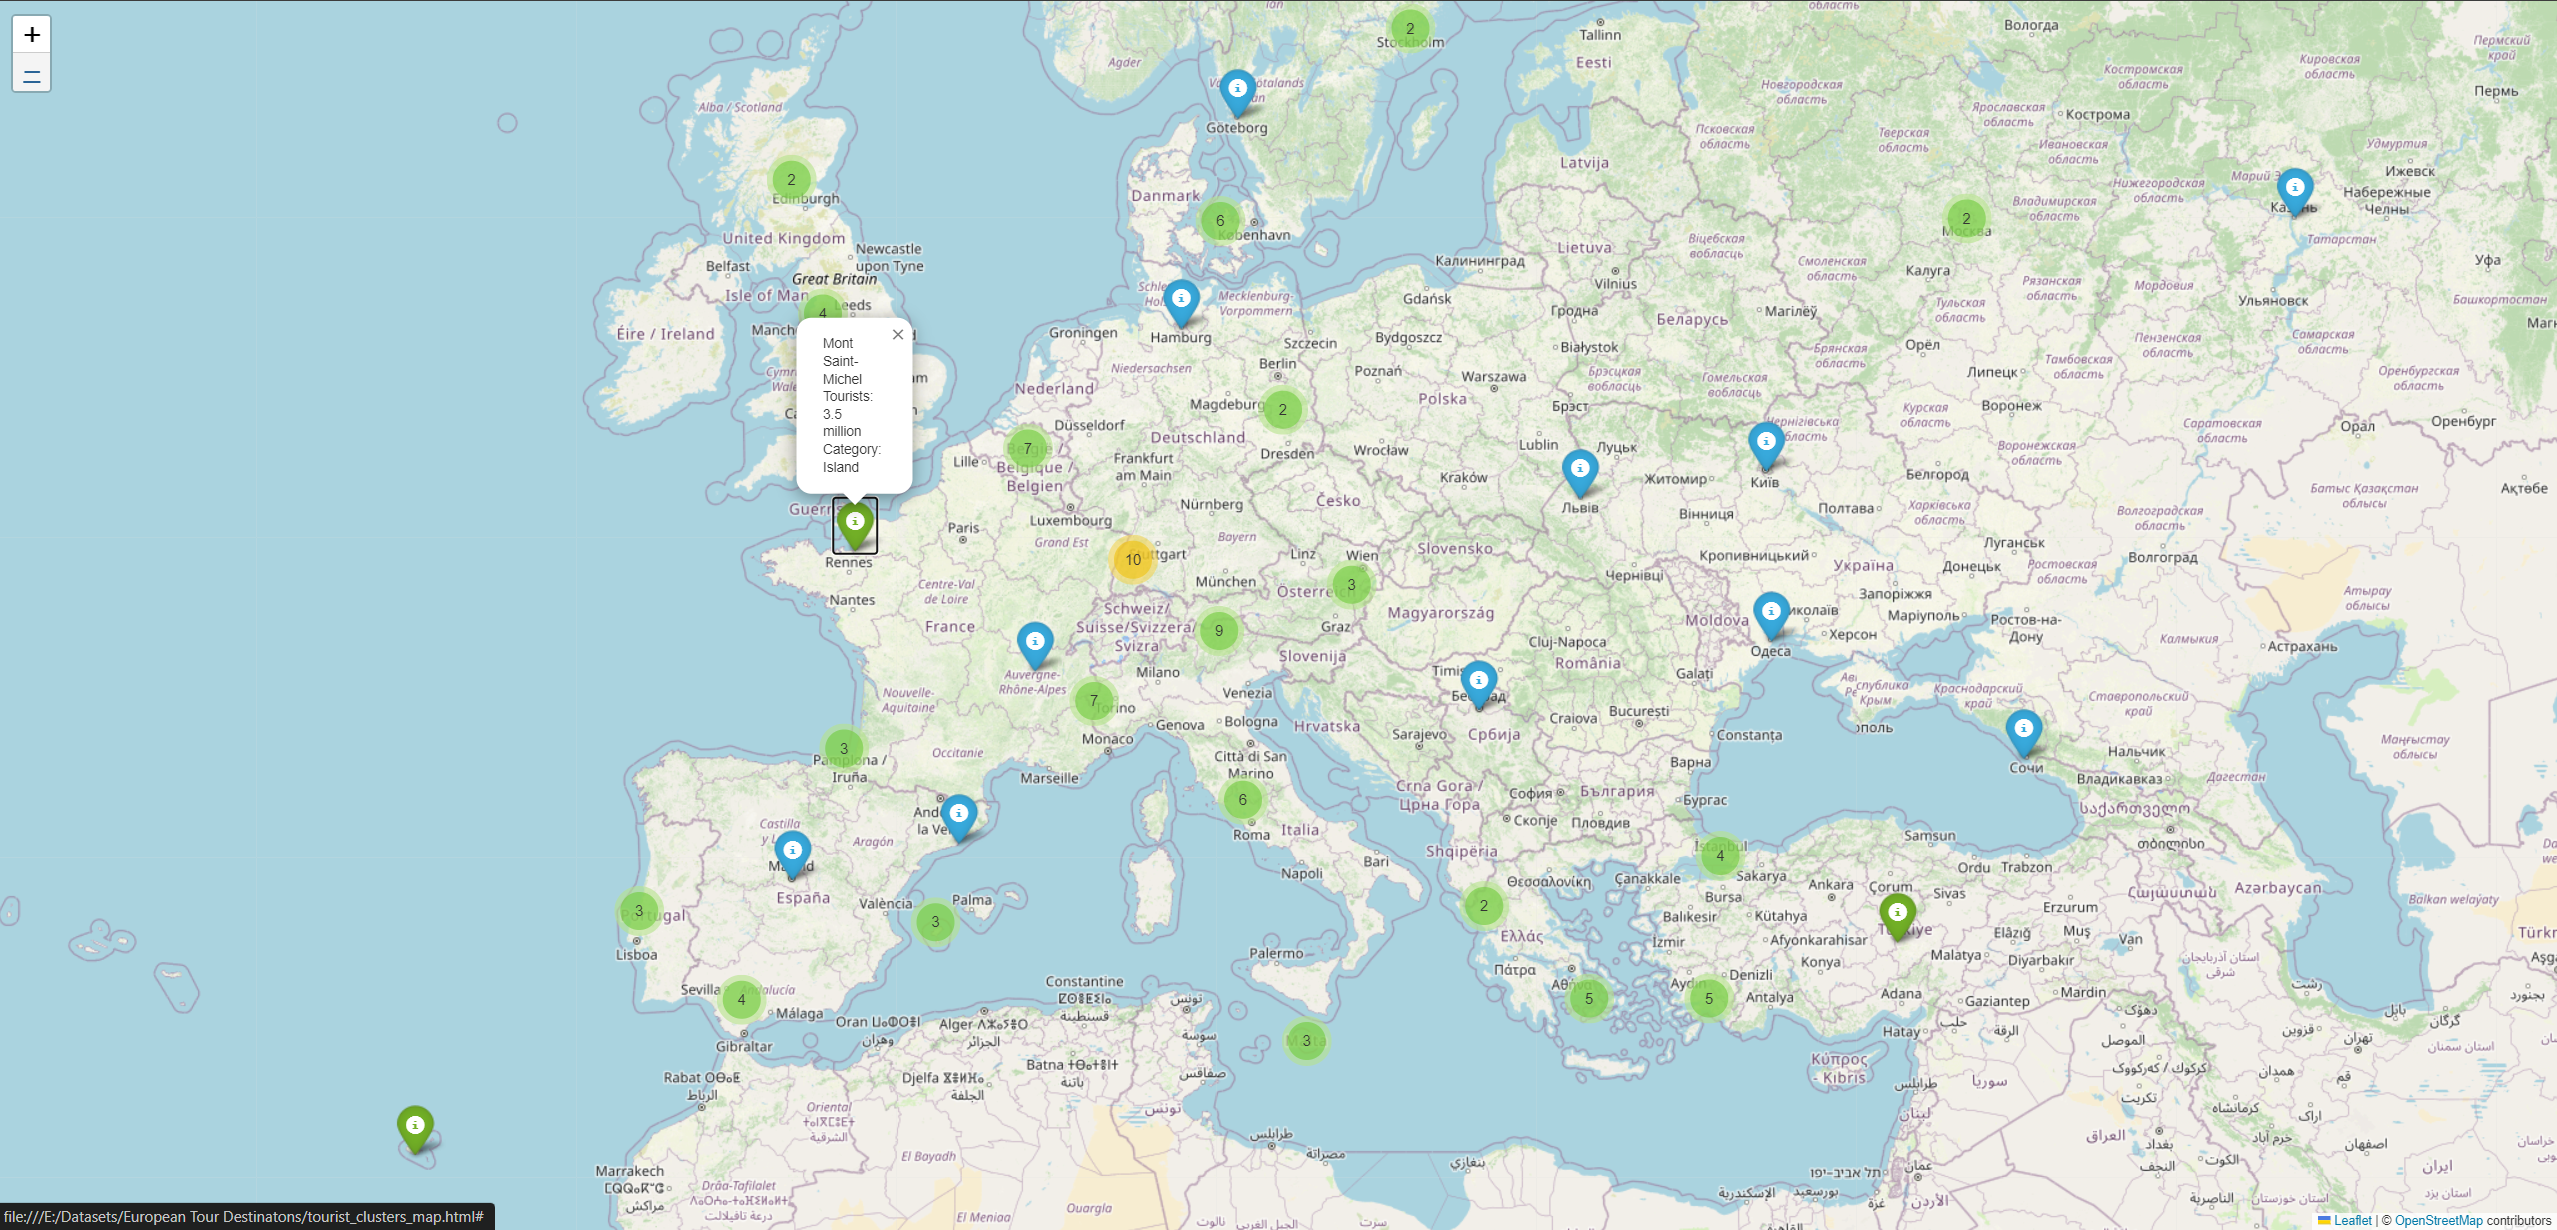

## Insights

1. **Concentration in Western Europe**: The map shows a high density of tourist clusters in Western Europe, particularly in countries like France, Germany, and Spain, indicating their strong appeal due to cultural and historical attractions.

2. **Emerging Eastern European Spots**: There are clusters in Eastern Europe and parts of Russia, suggesting growing interest in these regions and potential for tourism development.

3. **Diverse Attractions**: The variety of clusters, including islands, cities, and regions, highlights the diverse range of attractions that draw tourists.

4. **Popular Tourist Routes**: The distribution suggests common tourist routes and areas of interest, which could be leveraged for targeted marketing and infrastructure improvements.

## Conclusion

The map illustrates the dominance of Western Europe as a tourist destination, driven by its rich cultural and historical offerings. However, the presence of clusters in Eastern Europe and other regions indicates potential growth opportunities. By enhancing tourism infrastructure and marketing in less-visited areas, these regions could attract more visitors and diversify the European tourism landscape.


In [37]:
# Convert 'Cost of Living' into an ordinal scale for analysis
cost_of_living_mapping = {'Low': 1, 'Medium': 2, 'Medium-high': 3, 'High': 4, 'Extremely high': 5}
df_cleaned['Cost of Living Numeric'] = df_cleaned['Cost of Living'].map(cost_of_living_mapping)

In [38]:
# Sort the dataframe by 'Cost of Living Numeric' to identify the destinations with the highest cost of living
high_cost_destinations = df_cleaned.sort_values(by='Cost of Living Numeric', ascending=False)

In [39]:
high_cost_destinations[['Destination', 'Approximate Annual Tourists Clean', 'Cost of Living']]

Destination  Approximate Annual Tourists Clean  Cost of Living
70            Monaco-Ville                            3000000  Extremely high
72           Casino Square                            2000000  Extremely high
71             Monte Carlo                            3000000  Extremely high
62               Frankfurt                            7000000            High
110                   Oslo                            2500000            High
..                     ...                                ...             ...
144              Pamukkale                            1000000          Medium
95                   Corfu                            1500000          Medium
199               Belgrade                            1500000          Medium
89   St. Basil's Cathedral                            2000000            Free
149            Blue Mosque                            2000000            Free

[120 rows x 3 columns]

<Figure size 1000x600 with 0 Axes>

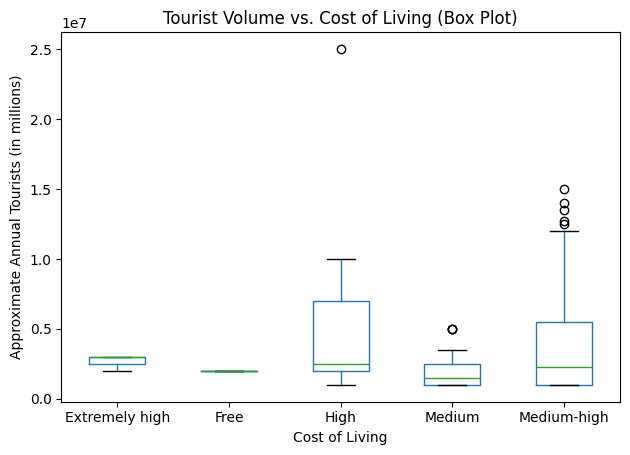

In [40]:
# Create a box plot for Tourist Volume vs. Cost of Living
plt.figure(figsize=(10, 6))

# Boxplot for Approximate Annual Tourists Clean vs Cost of Living
high_cost_destinations.boxplot(column='Approximate Annual Tourists Clean', by='Cost of Living', grid=False)

# Add labels and title
plt.title('Tourist Volume vs. Cost of Living (Box Plot)')
plt.suptitle('')  # Suppress the automatic "Boxplot grouped by" title
plt.xlabel('Cost of Living')
plt.ylabel('Approximate Annual Tourists (in millions)')

# Show the plot
plt.tight_layout()
plt.show()

## Impact of Cost of Living on Tourist Numbers

1. **High Cost, High Appeal**: Destinations with a high cost of living can still attract many tourists, often because they offer premium experiences or unique attractions that justify the expense.

2. **Deterrent Effect**: Extremely high costs can deter tourists, as the financial burden may outweigh the perceived value of the visit.

3. **Free or Low-Cost Limitations**: Surprisingly, destinations with free or very low costs of living also see lower tourist numbers, possibly due to a lack of attractions or infrastructure.

4. **Medium-High Variability**: In the medium-high cost category, tourist numbers vary widely, indicating that other factors, such as cultural significance or natural beauty, can influence tourist decisions despite higher costs.

Overall, while cost is a significant factor, the value and uniqueness of the destination can mitigate its impact.


In [41]:
# Filter for destinations with Medium or Low cost of living
low_medium_cost_df = df_cleaned[df_cleaned['Cost of Living'].isin(['Low', 'Medium'])]

# Sort by tourist volume in descending order to find regions with the highest tourist numbers
low_medium_cost_high_tourists = low_medium_cost_df.sort_values(by='Approximate Annual Tourists Clean', ascending=False)

In [42]:
low_medium_cost_high_tourists

Destination                      Region      Country  \
4                      Naples                    Campania        Italy   
63                    Cologne      North Rhine-Westphalia      Germany   
42                      Ghent               East Flanders      Belgium   
22                  Marseille  Provence-Alpes-Cte d'Azur       France   
12                    Seville                   Andalusia        Spain   
65                    Dresden                      Saxony      Germany   
51                     Aarhus          Region Midtjylland      Denmark   
85                Lake Baikal              Irkutsk Oblast       Russia   
13                   Valencia         Valencian Community        Spain   
83                      Kazan       Republic of Tatarstan       Russia   
15                     M laga                   Andalusia        Spain   
44                     Leuven             Flemish Brabant      Belgium   
14                    Granada                   Andalusia        Spain   
151                      Lviv                 Lviv Oblast      Ukraine   
121                Gothenburg      Vstra Gtaland County       Sweden   
95                      Corfu              Ionian Islands       Greece   
143                   Ephesus               Aegean Region       Turkey   
199                  Belgrade              Central Serbia       Serbia   
7                        Pisa                     Tuscany        Italy   
52                     Odense           Region Syddanmark      Denmark   
73       Oceanographic Museum                Monaco-Ville       Monaco   
96                    Meteora                    Thessaly       Greece   
97                     Delphi              Central Greece       Greece   
45                     Dinant                       Namur      Belgium   
122                     Malm                Skne County       Sweden   
129               Vasa Museum            Stockholm County       Sweden   
136               Rhine Falls                Schaffhausen  Switzerland   
34                       Graz                      Styria      Austria   
144                 Pamukkale               Aegean Region       Turkey   
9                      Verona                      Veneto        Italy   
152                    Odessa                Odesa Oblast      Ukraine   
67   Rothenburg ob der Tauber                     Bavaria      Germany   

                Category   Latitude   Longitude                 Currency  \
4                   City  40.851330   14.254720                     Euro   
63                  City  50.936662    6.959955                     Euro   
42                  City  51.057089    3.715678                     Euro   
22          Coastal City  43.296168    5.370254                     Euro   
12                  City  37.389080   -5.983980                     Euro   
65                  City  51.051005   13.737234                     Euro   
51                  City  56.150947   10.217696       Danish krone (DKK)   
85                  Lake  53.151074  105.257548      Russian Ruble (RUB)   
13                  City  39.472925   -0.378464                     Euro   
83                  City  55.794722   49.111389      Russian Ruble (RUB)   
15                  City  36.720161   -4.421234                     Euro   
44                  City  50.872166    4.686716                     Euro   
14                  City  37.187222   -3.605310                     Euro   
151                 City  49.839973   23.989223  Ukrainian hryvnia (UAH)   
121                 City  57.708863   11.973339      Swedish krona (SEK)   
95                Island  39.613728   19.900073                     Euro   
143  Archaeological Site  37.742778   27.391667       Turkish lira (TRY)   
199                 City  44.816667   20.448889      Serbian dinar (RSD)   
7                   City  43.715899   10.996557                     Euro   
52                  City  55.397081   10.395973       D

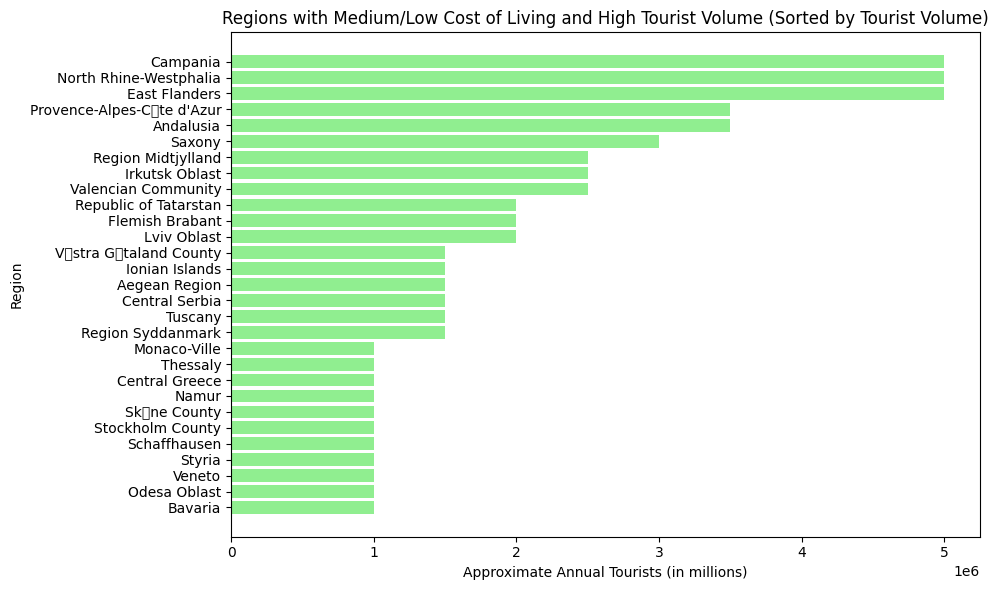

In [43]:
# Plotting the tourist volume for medium/low cost of living regions, sorted from highest to lowest
plt.figure(figsize=(10, 6))
plt.barh(low_medium_cost_high_tourists['Region'], low_medium_cost_high_tourists['Approximate Annual Tourists Clean'], color='lightgreen')

# Invert the y-axis to have the highest tourist volume at the top
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Approximate Annual Tourists (in millions)')
plt.ylabel('Region')
plt.title('Regions with Medium/Low Cost of Living and High Tourist Volume (Sorted by Tourist Volume)')

# Show the plot
plt.tight_layout()
plt.show()

## Insights from Regions with Medium/Low Cost of Living and High Tourist Volume

1. **Popular Regions**: Campania and North Rhine-Westphalia lead in tourist volume, indicating their strong appeal despite a medium/low cost of living.

2. **Diverse Attractions**: Regions like Provence-Alpes-Côte d'Azur and Andalusia attract many visitors, suggesting a mix of cultural, historical, and natural attractions.

3. **Economic Accessibility**: The combination of low cost of living and high tourist volume suggests these regions offer economically accessible travel options.

4. **Geographical Spread**: The list includes a wide geographical spread, from Western Europe to Eastern regions, highlighting diverse tourism opportunities.

Overall, these regions successfully balance affordability with attractive offerings, drawing significant tourist interest.


In [51]:
# Split 'Famous Foods' into individual items and create a list of all food items
all_foods = df['Famous Foods'].str.split(', ').explode()

# Count the occurrences of each food item
food_counts = all_foods.value_counts()

# Display the top most common famous foods
print("Most Common Famous Foods Across Regions:")
food_counts

Most Common Famous Foods Across Regions:


Famous Foods
Borscht            20
Fish               20
Seafood            17
Raclette           11
Fondue             11
                   ..
Himmel un d       1
Klsch              1
Grne Soáe          1
Apfelwein           1
Lyonnaise salad     1
Name: count, Length: 136, dtype: int64

In [46]:
# Get the top 5 and bottom 5 most common foods
top_5_foods = food_counts.head(5)
bottom_5_foods = food_counts.tail(5)

# Combine the top and bottom 5 into a single series for plotting
top_bottom_foods = pd.concat([top_5_foods, bottom_5_foods])

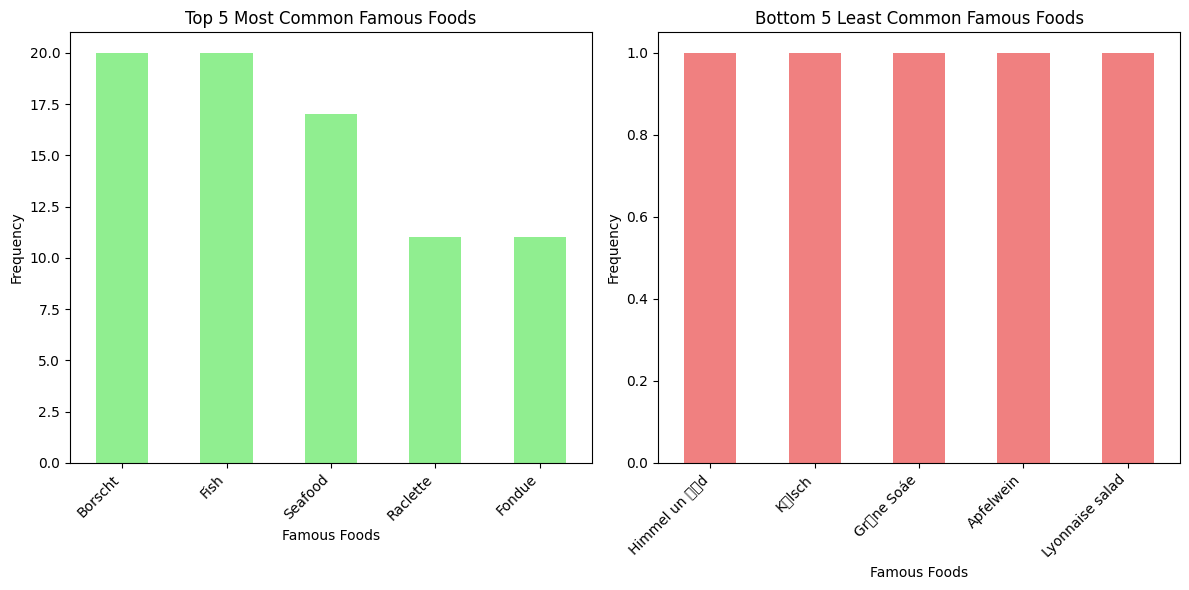

In [48]:
# Create two plots: one for top 5 and one for bottom 5
plt.figure(figsize=(12, 6))

# Plot for Top 5 Famous Foods
plt.subplot(1, 2, 1)
top_5_foods.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Most Common Famous Foods')
plt.xlabel('Famous Foods')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Plot for Bottom 5 Famous Foods
plt.subplot(1, 2, 2)
bottom_5_foods.plot(kind='bar', color='lightcoral')
plt.title('Bottom 5 Least Common Famous Foods')
plt.xlabel('Famous Foods')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Insights

1. **Borscht, Fish, and Seafood Popularity**:
   - **Borscht**: A traditional Eastern European soup, often made with beets, showcasing cultural heritage.
   - **Fish and Seafood**: Highlight the global appeal of fresh and diverse marine dishes.

2. **Raclette and Fondue**:
   - **Raclette**: A Swiss dish involving melted cheese, popular for its communal dining experience.
   - **Fondue**: Known for social dining, emphasizes the cultural significance of shared meals.

3. **Less Common Foods**:
   - **Himmel un Ääd, Kölsch, Grüne Soße, Apfelwein, Lyonnaise Salad**: These are region-specific, indicating local culinary traditions that may not have widespread recognition.

## Conclusion

The chart demonstrates a blend of globally popular foods and those with regional appeal. While dishes like borscht and seafood have widespread recognition, others like raclette and fondue highlight the importance of cultural dining experiences. The less common foods suggest opportunities for culinary tourism focused on unique, local flavors.


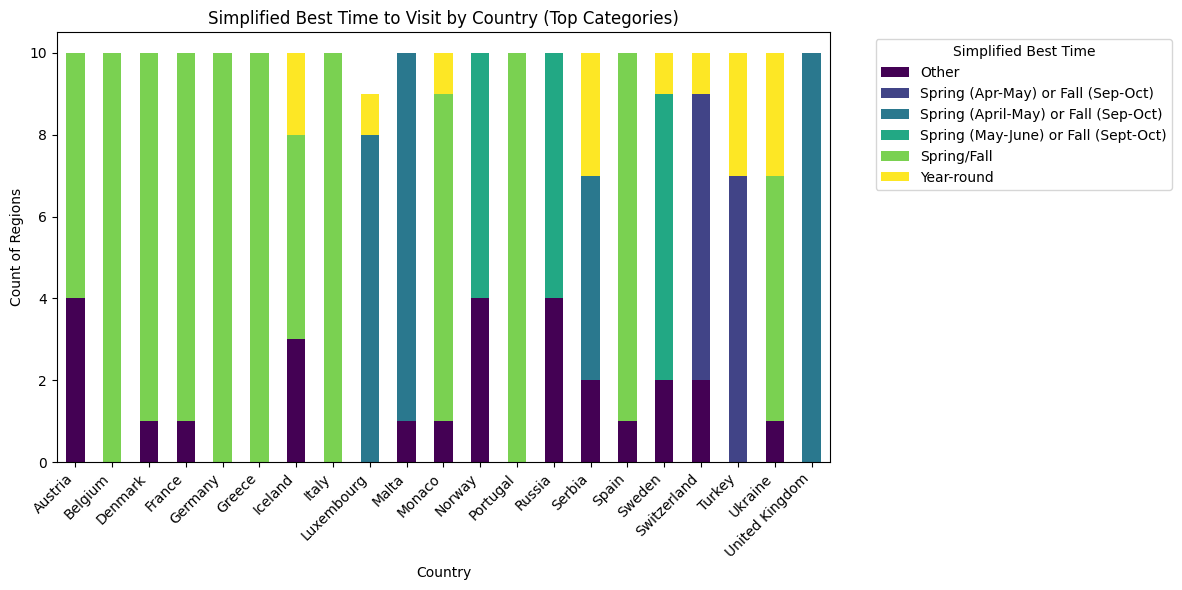

In [56]:
# Simplify the 'Best Time to Visit' into broader categories
df['Simplified Best Time'] = df['Best Time to Visit'].replace({
    'Spring (April-May) or Fall (Sept-Oct)': 'Spring/Fall',
    'Spring (May-June) or Fall (Sep-Oct)': 'Spring/Fall',
    'Summer (Jun-Aug)': 'Summer',
    'Summer (Jun-Sept)': 'Summer',
    'Winter (Dec-Mar)': 'Winter',
    'Year-round': 'Year-round'
})

# Focus on top 5 categories and group the rest as 'Other'
top_categories = df['Simplified Best Time'].value_counts().head(5).index
df['Simplified Best Time'] = df['Simplified Best Time'].apply(lambda x: x if x in top_categories else 'Other')

# Count occurrences of each Simplified Best Time per Country
best_time_counts = df.groupby(['Country', 'Simplified Best Time']).size().unstack(fill_value=0)

# Create a bar plot for Best Time to Visit across countries
best_time_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Move the legend outside of the plot
plt.legend(title='Simplified Best Time', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and title
plt.title('Simplified Best Time to Visit by Country (Top Categories)')
plt.xlabel('Country')
plt.ylabel('Count of Regions')
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Insights

1. **Spring and Fall Popularity**: Most countries have regions best visited in spring and fall, suggesting these seasons offer favorable weather and fewer crowds.
   
2. **Year-Round Destinations**: Countries like Italy and Spain have regions that are attractive year-round, indicating diverse attractions that appeal in any season.

3. **Seasonal Variability**: Some countries, such as Iceland and Norway, show a mix of best times, reflecting varied climates and attractions.

4. **Limited Winter Appeal**: The chart shows fewer regions recommended for winter visits, likely due to harsher weather conditions.

## Conclusion

The chart highlights the importance of spring and fall as ideal travel seasons across Europe, offering a balance of pleasant weather and manageable tourist numbers. Year-round destinations in countries like Italy and Spain provide flexibility for travelers. Understanding these patterns can help tourists plan their visits to maximize enjoyment and convenience.


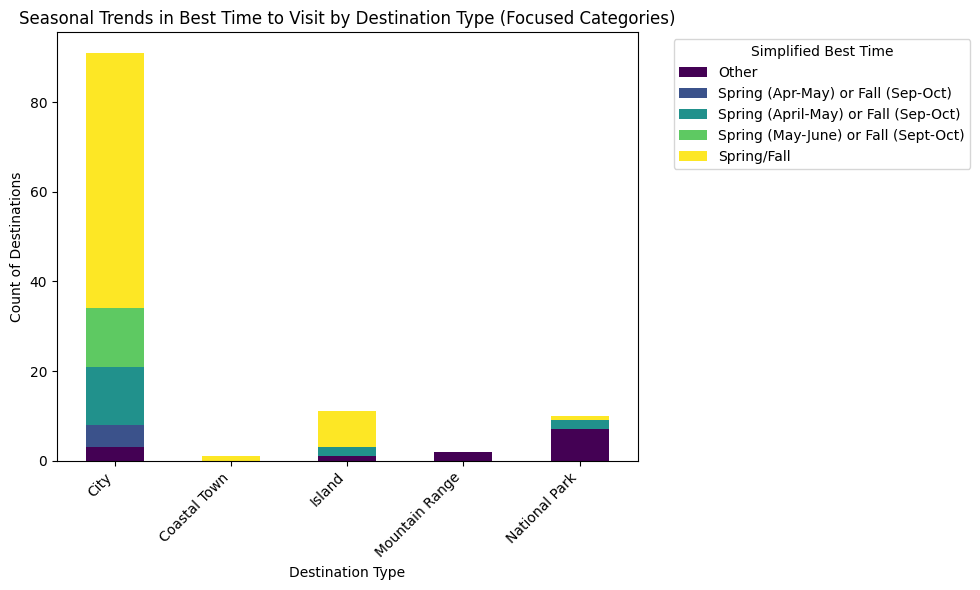

In [58]:
# Focus on key destination categories
key_categories = ['City', 'Island', 'Coastal Town', 'National Park', 'Mountain Range']
df_filtered = df[df['Category'].isin(key_categories)]

# Group by Category and Simplified Best Time, then count occurrences
best_time_by_category = df_filtered.groupby(['Category', 'Simplified Best Time']).size().unstack(fill_value=0)

# Create a stacked bar chart for Best Time to Visit by Category
best_time_by_category.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Add labels and title
plt.title('Seasonal Trends in Best Time to Visit by Destination Type (Focused Categories)')
plt.xlabel('Destination Type')
plt.ylabel('Count of Destinations')
plt.xticks(rotation=45, ha='right')

# Move the legend outside the plot
plt.legend(title='Simplified Best Time', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Insights

1. **Cities as Year-Round Destinations**: Cities dominate as destinations with flexible visiting times, particularly in spring and fall, due to diverse attractions and activities.
   
2. **Limited Seasonal Appeal for Coastal Towns**: Coastal towns have fewer recommended visiting times, possibly due to weather dependencies and seasonal attractions.

3. **Islands and Mountain Ranges**: These have varied best times, indicating a mix of seasonal activities and climate considerations.

4. **National Parks**: Show a preference for specific seasons, likely due to weather conditions affecting accessibility and activities.

## Conclusion

The chart highlights cities as versatile destinations suitable for visits throughout much of the year, especially in spring and fall. Other destination types, like islands and national parks, require more careful planning to align with optimal seasonal conditions. Travelers can use these insights to plan trips that maximize enjoyment based on destination type and seasonality.


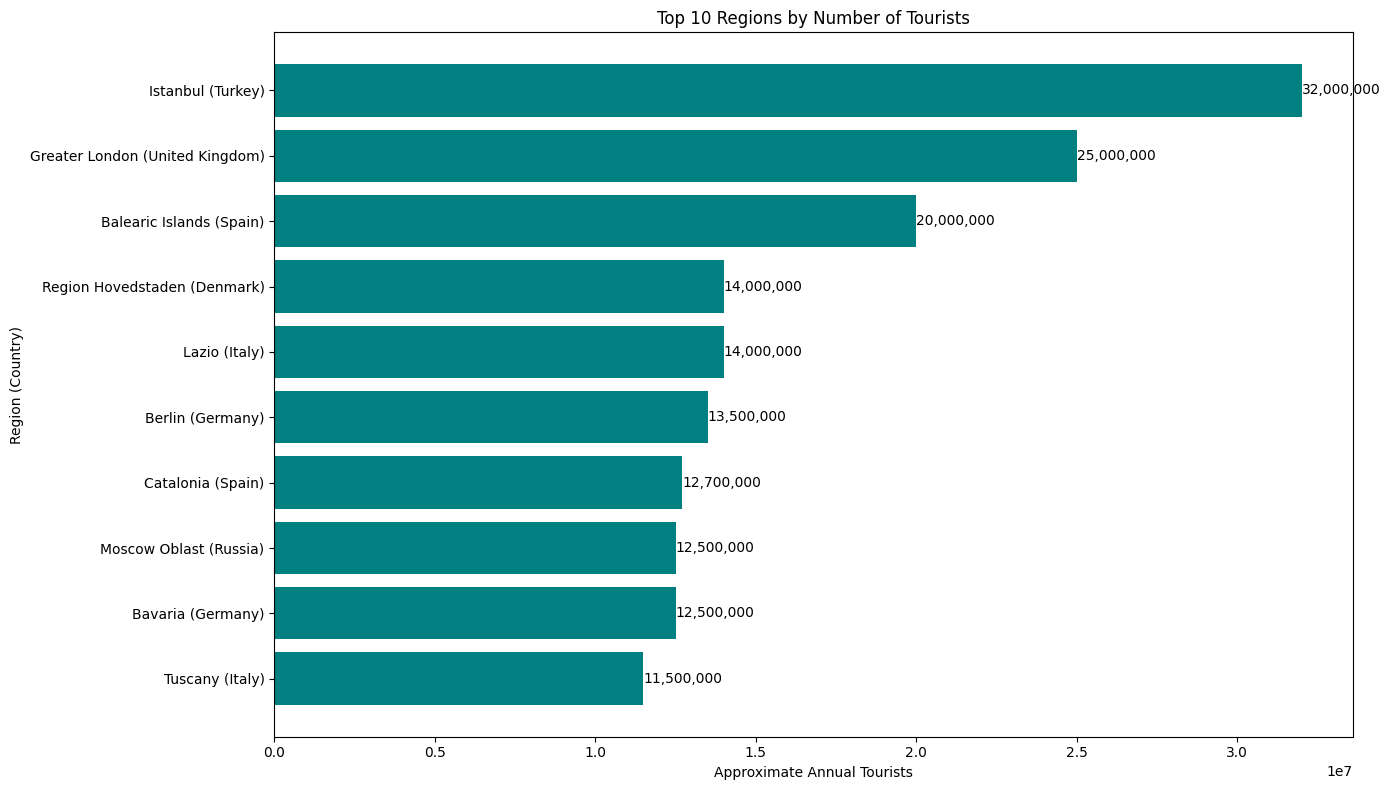

In [61]:
# Group by Country and Region to get the sum of Approximate Annual Tourists
tourist_by_region = df.groupby(['Country', 'Region'])['Approximate Annual Tourists Clean'].sum().reset_index()

# Sort by the number of tourists to get the top regions and limit to top 10
tourist_by_region = tourist_by_region.sort_values(by='Approximate Annual Tourists Clean', ascending=False).head(10)

# Plot the results using a bar chart
plt.figure(figsize=(14, 8))
bars = plt.barh(tourist_by_region['Region'] + ' (' + tourist_by_region['Country'] + ')', 
                tourist_by_region['Approximate Annual Tourists Clean'], color='teal')

# Add data labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}', va='center')

# Add labels and title
plt.xlabel('Approximate Annual Tourists')
plt.ylabel('Region (Country)')
plt.title('Top 10 Regions by Number of Tourists')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show the plot
plt.tight_layout()
plt.show()

## Insights

1. **Istanbul Leads**: Istanbul, Turkey, tops the list with 32 million tourists, highlighting its cultural and historical significance.
   
2. **Major Cities and Regions**: Greater London and the Balearic Islands also attract large numbers, showcasing their global appeal and diverse attractions.

3. **Diverse Geographic Representation**: Regions from various countries, including Spain, Denmark, Italy, and Germany, indicate a wide spread of popular tourist destinations across Europe.

4. **Cultural and Historical Appeal**: Many top regions, such as Lazio and Tuscany, are known for their rich history and cultural landmarks.

## Conclusion

The chart underscores the popularity of major cities and culturally rich regions in Europe as top tourist destinations. Istanbul's lead reflects its unique blend of history and modernity. The diverse geographic representation suggests that tourists are drawn to a variety of experiences, from urban exploration to cultural heritage.


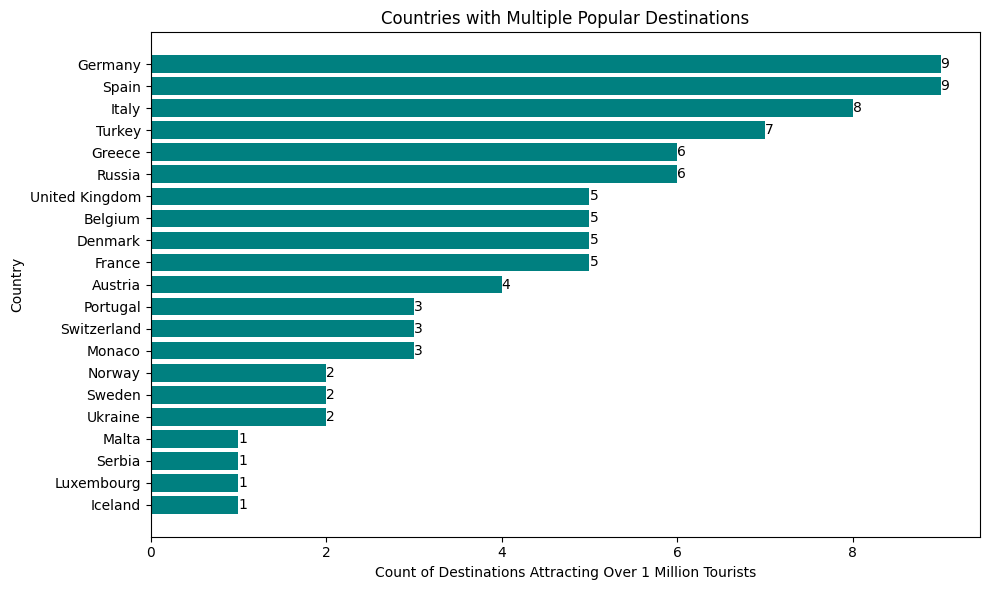

In [62]:
# Filter destinations with over 1 million tourists
popular_destinations = df[df['Approximate Annual Tourists Clean'] > 1000000]

# Count the number of popular destinations per country
popular_by_country = popular_destinations.groupby('Country')['Destination'].count().reset_index()
popular_by_country.columns = ['Country', 'Count of Popular Destinations']

# Sort to show countries with the most popular destinations
popular_by_country = popular_by_country.sort_values(by='Count of Popular Destinations', ascending=False)

# Visualize the results
plt.figure(figsize=(10, 6))
bars = plt.barh(popular_by_country['Country'], popular_by_country['Count of Popular Destinations'], color='teal')

# Add data labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center')

# Add labels and title
plt.xlabel('Count of Destinations Attracting Over 1 Million Tourists')
plt.ylabel('Country')
plt.title('Countries with Multiple Popular Destinations')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show the plot
plt.tight_layout()
plt.show()

## Insights

1. **Germany and Spain Lead**: Both countries have the highest number of popular destinations, each with nine, reflecting their diverse attractions and strong tourism infrastructure.

2. **Italy and Turkey**: Italy follows closely with eight destinations, while Turkey has seven, highlighting their rich cultural and historical offerings.

3. **Variety Across Europe**: Countries like Greece, Russia, and the United Kingdom also have multiple popular spots, indicating a wide range of appealing destinations across Europe.

4. **Emerging Destinations**: Countries with fewer popular spots, such as Malta and Iceland, may represent emerging or niche tourism markets.

## Conclusion

The chart shows that Germany and Spain are top contenders for tourism with numerous popular destinations. This suggests a well-rounded appeal, from cultural sites to natural landscapes. The spread across various countries indicates that Europe offers a rich tapestry of experiences, catering to diverse tourist interests. Emerging destinations provide opportunities for growth and exploration in less-traveled areas.
